In [1]:
import pandas as pd
import numpy as np

In [2]:
obj=pd.Series([4,6,7,-5,3])

In [9]:
path = '/Users/peter/Computrain/InCompany/Europese Commisie/Python Data Science/Books/Python for Data Analysis/pydata-book-2nd-edition'
df=pd.read_csv(path + '/examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
!cat pydata-book-2nd-edition/examples/ex2.csv
1,2,3,4,'hello'
5,6,7,8,'world'
9,10,11,12,'foo'

cat: pydata-book-2nd-edition/examples/ex2.csv: No such file or directory


(9, 10, 11, 12, 'foo')

In [16]:
df=pd.read_csv('pydata-book-2nd-edition/examples/ex2.csv',header=None)

In [17]:
df


,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [19]:
df=pd.read_csv('pydata-book-2nd-edition/examples/ex2.csv',names=['a','b','c','d','message'])

In [20]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [27]:
import xarray as xr

ds = xr.open_dataset('/path/to/netcdf')
df = ds.to_dataframe()

FileNotFoundError: [Errno 2] No such file or directory: b'/path/to/netcdf'

In [2]:
dropna?


Object `dropna` not found.


In [3]:
import netCDF4


ModuleNotFoundError: No module named 'netCDF4'

In [4]:
!pip install netCDF4

    100% |################################| 5.3MB 204kB/s eta 0:00:01
You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import netCDF4


In [39]:
nc = netCDF4.Dataset('dis.nc')

In [40]:
nc.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float64 lon(xc)
                  standard_name: longitude
                  long_name: longitude coordinate
                  units: degrees_east
              unlimited dimensions: 
              current shape = (1000,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(yc)
                  standard_name: latitude
                  long_name: latitude coordinate
                  units: degrees_north
              unlimited dimensions: 
              current shape = (950,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  standard_name: time
                  units: days since 1996-01-01
                  calendar: proleptic_gregorian
              unlimited dimensions: time

In [9]:
q= nc.variables['dis']

In [10]:
q

<class 'netCDF4._netCDF4.Variable'>
float32 dis(time, yc, xc)
    least_significant_digit: 2
    coordinates: lon lat
    esri_pe_string: GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]]
    standard_name: dis
    long_name: discharge
    units: m^3/sec
unlimited dimensions: time
current shape = (15, 950, 1000)
filling on, default _FillValue of 9.969209968386869e+36 used

In [11]:
q.dimensions

('time', 'yc', 'xc')

In [12]:
times = nc.variables['time']

In [13]:
times.dimensions

('time',)

In [14]:
jd=netCDF4.num2date(times[:],times.units)

In [15]:
jd

array([datetime.datetime(1996, 1, 1, 0, 0),
       datetime.datetime(1996, 1, 2, 0, 0),
       datetime.datetime(1996, 1, 3, 0, 0),
       datetime.datetime(1996, 1, 4, 0, 0),
       datetime.datetime(1996, 1, 5, 0, 0),
       datetime.datetime(1996, 1, 6, 0, 0),
       datetime.datetime(1996, 1, 7, 0, 0),
       datetime.datetime(1996, 1, 8, 0, 0),
       datetime.datetime(1996, 1, 9, 0, 0),
       datetime.datetime(1996, 1, 10, 0, 0),
       datetime.datetime(1996, 1, 11, 0, 0),
       datetime.datetime(1996, 1, 12, 0, 0),
       datetime.datetime(1996, 1, 13, 0, 0),
       datetime.datetime(1996, 1, 14, 0, 0),
       datetime.datetime(1996, 1, 15, 0, 0)], dtype=object)

In [22]:
q


<class 'netCDF4._netCDF4.Variable'>
float32 dis(time, yc, xc)
    least_significant_digit: 2
    coordinates: lon lat
    esri_pe_string: GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]]
    standard_name: dis
    long_name: discharge
    units: m^3/sec
unlimited dimensions: time
current shape = (15, 950, 1000)
filling on, default _FillValue of 9.969209968386869e+36 used

In [19]:
import matplotlib as plt


In [21]:
qtss

1996-01-01   NaN
1996-01-02   NaN
1996-01-03   NaN
1996-01-04   NaN
1996-01-05   NaN
1996-01-06   NaN
1996-01-07   NaN
1996-01-08   NaN
1996-01-09   NaN
1996-01-10   NaN
1996-01-11   NaN
1996-01-12   NaN
1996-01-13   NaN
1996-01-14   NaN
1996-01-15   NaN
dtype: float32

In [26]:
q.getValue([:])

SyntaxError: invalid syntax (<ipython-input-26-4eee86bd2c74>, line 1)

In [28]:
import xarray as xr

ds = xr.open_dataset('dis.nc')
df = ds.to_dataframe()

In [29]:
df

lon        lat  dis
time       xc  yc                            
1996-01-01 0   0    2502500.0  5497500.0  NaN
               1    2502500.0  5492500.0  NaN
               2    2502500.0  5487500.0  NaN
               3    2502500.0  5482500.0  NaN
               4    2502500.0  5477500.0  NaN
               5    2502500.0  5472500.0  NaN
               6    2502500.0  5467500.0  NaN
               7    2502500.0  5462500.0  NaN
               8    2502500.0  5457500.0  NaN
               9    2502500.0  5452500.0  NaN
               10   2502500.0  5447500.0  NaN
               11   2502500.0  5442500.0  NaN
               12   2502500.0  5437500.0  NaN
               13   2502500.0  5432500.0  NaN
               14   2502500.0  5427500.0  NaN
               15   2502500.0  5422500.0  NaN
               16   2502500.0  5417500.0  NaN
               17   2502500.0  5412500.0  NaN
               18   2502500.0  5407500.0  NaN
               19   2502500.0  5402500.0  NaN
               20   2502500.0  5397500.0  NaN
               21   2502500.0  5392500.0  NaN
               22   2502500.0  5387500.0  NaN
               23   2502500.0  5382500.0  NaN
               24   2502500.0  5377500.0  NaN
               25   2502500.0  5372500.0  NaN
               26   2502500.0  5367500.0  NaN
               27   2502500.0  5362500.0  NaN
               28   2502500.0  5357500.0  NaN
               29   2502500.0  5352500.0  NaN
...                       ...        ...  ...
1996-01-15 999 920  7497500.0   897500.0  NaN
               921  7497500.0   892500.0  NaN
               922  7497500.0   887500.0  NaN
               923  7497500.0   882500.0  NaN
               924  7497500.0   877500.0  NaN
               925  7497500.0   872500.0  NaN
               926  7497500.0   867500.0  NaN
               927  7497500.0   862500.0  NaN
               928  7497500.0   857500.0  NaN
               929  7497500.0   852500.0  NaN
               930  7497500.0   847500.0  NaN
               931  7497500.0   842500.0  NaN
               932  7497500.0   837500.0  NaN
               933  7497500.0   832500.0  NaN
               934  7497500.0   827500.0  NaN
               935  7497500.0   822500.0  NaN
               936  7497500.0   817500.0  NaN
               937  7497500.0   812500.0  NaN
               938  7497500.0   807500.0  NaN
               939  7497500.0   802500.0  NaN
               940  7497500.0   797500.0  NaN
               941  7497500.0   792500.0  NaN
               942  7497500.0   787500.0  NaN
               943  7497500.0   782500.0  NaN
               944  7497500.0   777500.0  NaN
               945  7497500.0   772500.0  NaN
               946  7497500.0   767500.0  NaN
               947  7497500.0   762500.0  NaN
               948  7497500.0   757500.0  NaN
               949  7497500.0   752500.0  NaN

[14250000 rows x 3 columns]

In [30]:
ds

<xarray.Dataset>
Dimensions:  (time: 15, xc: 1000, yc: 950)
Coordinates:
    lon      (xc) float64 2.502e+06 2.508e+06 2.512e+06 2.518e+06 2.522e+06 ...
    lat      (yc) float64 5.498e+06 5.492e+06 5.488e+06 5.482e+06 5.478e+06 ...
  * time     (time) datetime64[ns] 1996-01-01 1996-01-02 1996-01-03 ...
Dimensions without coordinates: xc, yc
Data variables:
    dis      (time, yc, xc) float32 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    history:          Created Wed Apr 18 12:42:06 2018
    Conventions:      CF-1.7
    Source_Software:  JRC pcr2nc
    source:           ECMWF Reforecasts 1996-2016
    reference:        JRC Space, Security, Migration

In [31]:
!ls


DemoNotebook.ipynb      Pandas4Eng.ipynb        pydata-book-2nd-edition
Numpy4Eng.ipynb         dis.nc


In [32]:
xarray.plot?


Object `xarray.plot` not found.


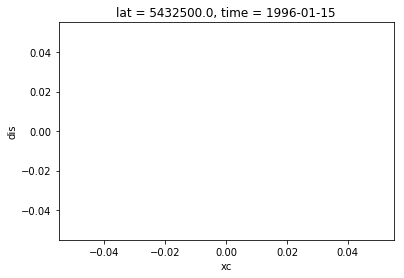

In [38]:
xr.plot.line(ds['dis'][14][13])